과제 #1은 IRIS 데이터를 아래와 같이 불러와서    
간단한 전처리(스케일링 등)와 EDA를 하고,     
'#1_참고자료.html'을 참고하여 KNN에 GridSearchCV를 적용해보는 과제입니다!   
그리고 BestParameter와 BestScore, TestsetScore를 구합니다.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# 아이리스 데이터 불러오기
iris = load_iris()

In [42]:

#IRIS 데이터 로드
new_iris =  sns.load_dataset('iris') 

In [43]:
new_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [45]:
#iris column name 확인
new_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

species가 타겟변수

In [46]:
#타겟변수 개수 확인
new_iris.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

종류 3개, 각각 50개로 비율 같음

In [47]:
#타겟변수 종류별 각 그룹의 평균을 구해보자
go_mean = new_iris.groupby(new_iris.species).mean()
go_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [48]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
plt.style.use('seaborn') 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)


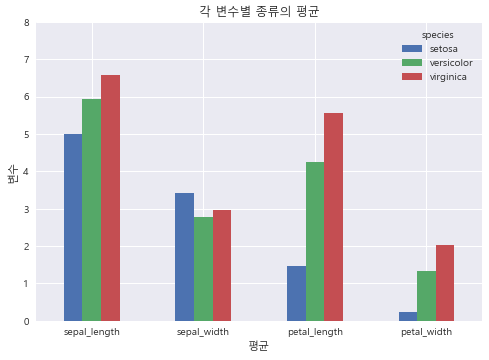

In [49]:
#barplot 활용하여 평균값들 시각화
go_mean.T.plot.bar(rot=0) # rot : x축 변수명의 기울기
plt.title("각 변수별 종류의 평균")
plt.xlabel("평균")
plt.ylabel("변수")
plt.ylim(0,8)
plt.show()

sepal_width를 제외하고는 setosa<versicolor<virginica 순으로 큰 값을 가지는군

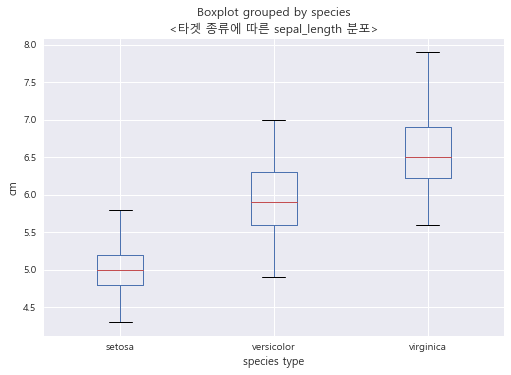

In [50]:
#이번엔 각 feature별로 뜯어서 boxplot을 활용하여 타겟변수의 분포를 확인해보자
# 1. sepal_length
new_iris[['sepal_length','species']].boxplot(by='species')
plt.title('<타겟 종류에 따른 sepal_length 분포>')
plt.xlabel('species type')
plt.ylabel('cm')
plt.show()

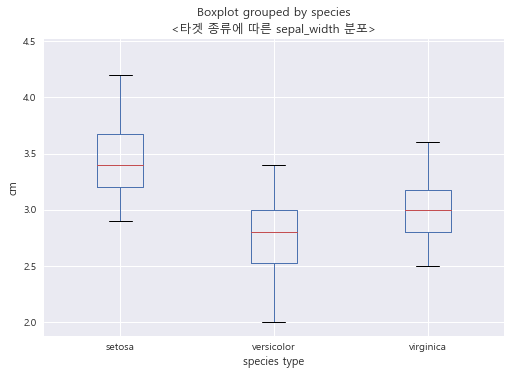

In [51]:
# 2. sepal_width
new_iris[['sepal_width','species']].boxplot(by='species')
plt.title('<타겟 종류에 따른 sepal_width 분포>')
plt.xlabel('species type')
plt.ylabel('cm')
plt.show()

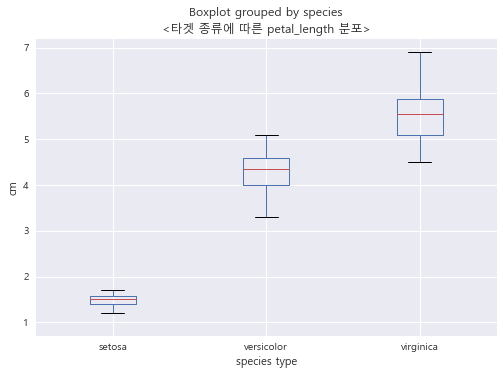

In [52]:
# 3. petal_length
new_iris[['petal_length','species']].boxplot(by='species')
plt.title('<타겟 종류에 따른 petal_length 분포>')
plt.xlabel('species type')
plt.ylabel('cm')
plt.show()

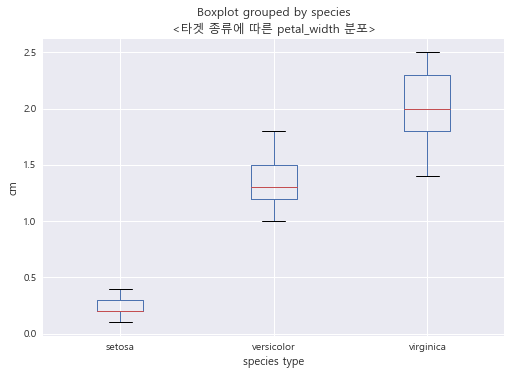

In [53]:
# 4. petal_width
new_iris[['petal_width','species']].boxplot(by='species')
plt.title('<타겟 종류에 따른 petal_width 분포>')
plt.xlabel('species type')
plt.ylabel('cm')
plt.show()

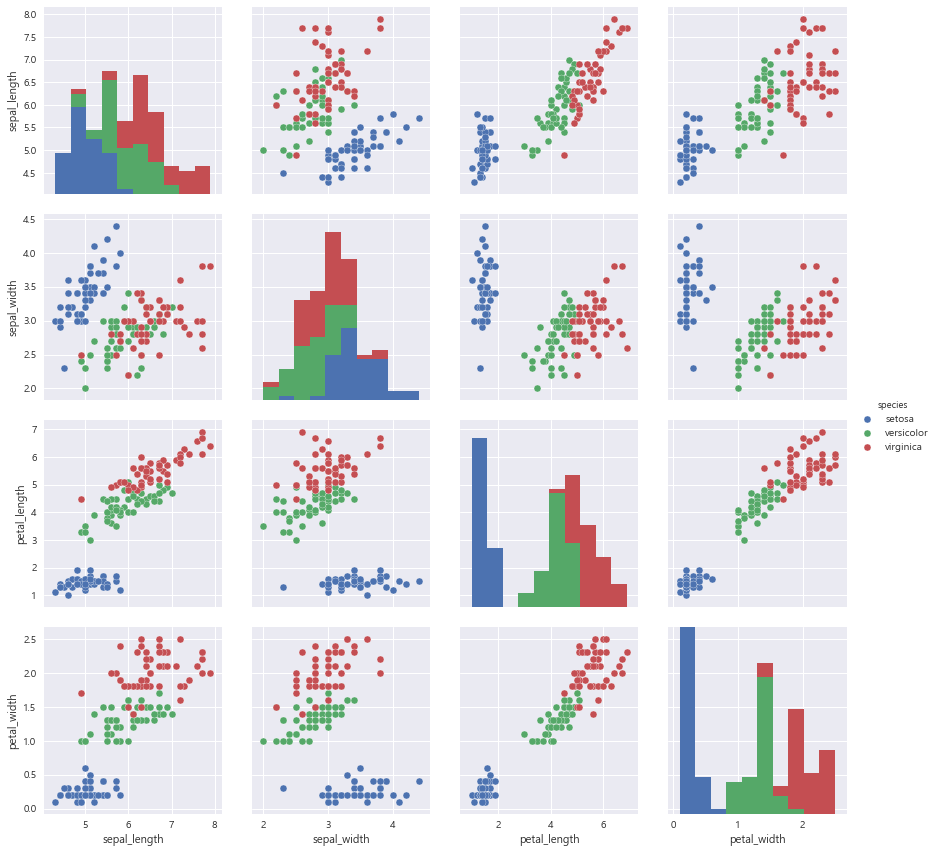

In [55]:
#pairplot 그려보기
sns.pairplot(new_iris, hue="species", size=3)

In [56]:
#iris.data -> features, iris.target -> labels
X = iris.data
y = iris.target

In [57]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [58]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [59]:
# Train, Test 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=48)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [62]:
#파라미터 조정
grid_params = {
    'n_neighbors' : [3,5,11,19],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

In [64]:
#그리드서치 진행
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3, #cv는 cross validation
    n_jobs = -1
    )

In [65]:
gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    4.6s finished


4 * 2 * 2 = 16개의 후보군에서 3 fold 진행, 따라서 총 48가지 경우의 수 도출

In [66]:
#이 중 가장 좋은 결과를 얻는 그리드는?
print("Best Parameter: {}".format(gs.best_params_))

Best Parameter: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [67]:
#grid_search 최종 스코어
print("Best Cross-validity Score: {:.3f}".format(gs.best_score_))

Best Cross-validity Score: 0.983


In [68]:
#Test 데이터에 적용
print("Test set Score: {:.3f}".format(gs.score(X_test, y_test)))

Test set Score: 0.933


In [69]:
#GridSearch의 범위를 1에서 10까지로 지정
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}

In [70]:
#KNN 알고리즘에 GridSearch를 적용
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [71]:
#Train 데이터에 적용
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [72]:
#가장 좋은 결과를 얻는 그리드는?
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 5}


In [73]:
#grid_search의 최종 스코어
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.983


In [74]:
#Test 데이터에 적용
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.933


In [75]:
#결과를 데이터프레임에 반환
result_grid = pd.DataFrame(grid_search.cv_results_)

In [76]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000985,0.000012,0.001198,0.000400,1,{'n_neighbors': 1},1.000000,0.916667,1.000000,0.958333,...,0.966667,0.031180,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000201,0.000402,0.001394,0.000478,2,{'n_neighbors': 2},0.958333,0.916667,0.958333,0.958333,...,0.950000,0.016667,10,0.968750,0.989583,0.968750,0.979167,0.979167,0.977083,0.007795
2,0.000396,0.000485,0.000802,0.000401,3,{'n_neighbors': 3},1.000000,0.916667,1.000000,0.958333,...,0.975000,0.033333,5,0.968750,0.989583,0.968750,0.979167,0.968750,0.975000,0.008333
3,0.000399,0.000488,0.001005,0.000012,4,{'n_neighbors': 4},0.958333,0.958333,1.000000,0.958333,...,0.966667,0.016667,8,0.958333,0.989583,0.958333,0.979167,0.968750,0.970833,0.012148
4,0.000595,0.000486,0.000806,0.000404,5,{'n_neighbors': 5},1.000000,0.958333,1.000000,0.958333,...,0.983333,0.020412,1,0.968750,0.989583,0.979167,0.979167,0.968750,0.977083,0.007795
5,0.000598,0.000489,0.000799,0.000399,6,{'n_neighbors': 6},1.000000,0.958333,0.958333,0.958333,...,0.975000,0.020412,5,0.958333,0.989583,0.979167,0.989583,0.979167,0.979167,0.011411
6,0.000200,0.000399,0.000799,0.000399,7,{'n_neighbors': 7},1.000000,0.958333,1.000000,0.958333,...,0.983333,0.020412,1,0.968750,0.989583,0.979167,0.989583,0.979167,0.981250,0.007795
7,0.000398,0.000487,0.000985,0.000038,8,{'n_neighbors': 8},1.000000,0.958333,1.000000,0.958333,...,0.983333,0.020412,1,0.968750,0.989583,0.968750,0.989583,0.979167,0.979167,0.009317
8,0.000598,0.000489,0.000399,0.000488,9,{'n_neighbors': 9},1.000000,0.958333,1.000000,0.958333,...,0.983333,0.020412,1,0.968750,0.989583,0.979167,0.989583,0.979167,0.981250,0.007795
9,0.000189,0.000378,0.001005,0.000019,10,{'n_neighbors': 10},0.958333,0.958333,1.000000,0.958333,...,0.975000,0.020412,5,0.958333,0.989583,0.968750,0.989583,0.979167,0.977083,0.012148


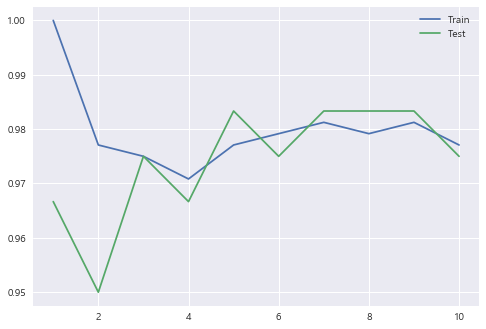

In [77]:
#그래프로 파라미터에 따른 train,test 스코어 나타내기
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

In [78]:
# k=3으로 knn모델 생성
knn = KNeighborsClassifier(n_neighbors = 3)

In [79]:
# 모델 트레인
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [80]:
# 예측값 생성
y_pred = knn.predict(X_test)

In [81]:
#정확도 스코어 확인
print('accuracy: ', knn.score(X_test, y_test))

accuracy:  0.9333333333333333


In [82]:
# 이번엔 k=5로 모델 생성
knn = KNeighborsClassifier(n_neighbors = 5)

In [83]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [84]:
y_pred = knn.predict(X_test)

In [85]:
#정확도 스코어 확인
print('accuracy: ', knn.score(X_test, y_test))

accuracy:  0.9333333333333333


5로 바꿔줘도 accuracy 값은 그대로임